# **Data Description**

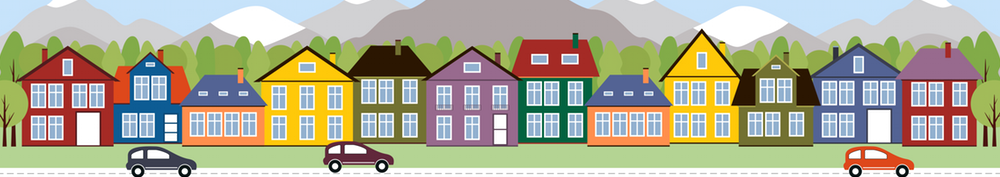


## File descriptions

   - train.csv - the training set
   - test.csv - the test set
   - data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
   - sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data fields

Here's a brief version of what you'll find in the data description file.

   - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
   - MSSubClass: The building class
   - MSZoning: The general zoning classification
   - LotFrontage: Linear feet of street connected to property
   - LotArea: Lot size in square feet
   - Street: Type of road access
   - Alley: Type of alley access
   - LotShape: General shape of property
   - LandContour: Flatness of the property
   - Utilities: Type of utilities available
   - LotConfig: Lot configuration
   - LandSlope: Slope of property
   - Neighborhood: Physical locations within Ames city limits
   - Condition1: Proximity to main road or railroad
   - Condition2: Proximity to main road or railroad (if a second is present)
   - BldgType: Type of dwelling
   - HouseStyle: Style of dwelling
   - OverallQual: Overall material and finish quality
   - OverallCond: Overall condition rating
   - YearBuilt: Original construction date
   - YearRemodAdd: Remodel date
   - RoofStyle: Type of roof
   - RoofMatl: Roof material
   - Exterior1st: Exterior covering on house
   - Exterior2nd: Exterior covering on house (if more than one material)
   - MasVnrType: Masonry veneer type
   - MasVnrArea: Masonry veneer area in square feet
   - ExterQual: Exterior material quality
   - ExterCond: Present condition of the material on the exterior
   - Foundation: Type of foundation
   - BsmtQual: Height of the basement
   - BsmtCond: General condition of the basement
   - BsmtExposure: Walkout or garden level basement walls
   - BsmtFinType1: Quality of basement finished area
   - BsmtFinSF1: Type 1 finished square feet
   - BsmtFinType2: Quality of second finished area (if present)
   - BsmtFinSF2: Type 2 finished square feet
   - BsmtUnfSF: Unfinished square feet of basement area
   - TotalBsmtSF: Total square feet of basement area
   - Heating: Type of heating
   - HeatingQC: Heating quality and condition
   - CentralAir: Central air conditioning
   - Electrical: Electrical system
   - 1stFlrSF: First Floor square feet
   - 2ndFlrSF: Second floor square feet
   - LowQualFinSF: Low quality finished square feet (all floors)
   - GrLivArea: Above grade (ground) living area square feet
   - BsmtFullBath: Basement full bathrooms
   - BsmtHalfBath: Basement half bathrooms
   - FullBath: Full bathrooms above grade
   - HalfBath: Half baths above grade
   - Bedroom: Number of bedrooms above basement level
   - Kitchen: Number of kitchens
   - KitchenQual: Kitchen quality
   - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
   - Functional: Home functionality rating
   - Fireplaces: Number of fireplaces
   - FireplaceQu: Fireplace quality
   - GarageType: Garage location
   - GarageYrBlt: Year garage was built
   - GarageFinish: Interior finish of the garage
   - GarageCars: Size of garage in car capacity
   - GarageArea: Size of garage in square feet
   - GarageQual: Garage quality
   - GarageCond: Garage condition
   - PavedDrive: Paved driveway
   - WoodDeckSF: Wood deck area in square feet
   - OpenPorchSF: Open porch area in square feet
   - EnclosedPorch: Enclosed porch area in square feet
   - 3SsnPorch: Three season porch area in square feet
   - ScreenPorch: Screen porch area in square feet
   - PoolArea: Pool area in square feet
   - PoolQC: Pool quality
   - Fence: Fence quality
   - MiscFeature: Miscellaneous feature not covered in other categories
   - MiscVal: $Value of miscellaneous feature
   - MoSold: Month Sold
   - YrSold: Year Sold
   - SaleType: Type of sale
   - SaleCondition: Condition of sale


## 1. Installing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 2. EDA (Exploratory of Data Analysis)
### 2.1. Data Preperation

In [2]:
def data():
    train_ = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
    test_ = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
    dataframe = pd.concat([train_, test_], ignore_index=True)
    return dataframe, train_, test_
df, train, test = data()


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


Let's check NaN values:

In [3]:
df.isnull().any().sum()

35

### 2.2. Categorical Variable Analysis

In [4]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Kategorik Değişken Sayısı: ', len(cat_cols))


def cat_summary(data, categorical_cols, target, number_of_classes=10):
    var_count = 0
    vars_more_classes = []
    for var in categorical_cols:
        if len(df[var].value_counts()) <= number_of_classes:  # sınıf sayısına göre seç
            print(pd.DataFrame({var: data[var].value_counts(),
                                "Ratio": 100 * data[var].value_counts() / len(data),
                                "TARGET_MEDIAN": data.groupby(var)[target].median()}), end="\n\n\n")
            var_count += 1
        else:
            vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)



cat_summary(df, cat_cols, "SalePrice")

Kategorik Değişken Sayısı:  43
         MSZoning  Ratio  TARGET_MEDIAN
C (all)        25  0.856      74700.000
FV            139  4.762     205950.000
RH             26  0.891     136500.000
RL           2265 77.595     174000.000
RM            460 15.759     120500.000


      Street  Ratio  TARGET_MEDIAN
Grvl      12  0.411     114250.000
Pave    2907 99.589     163000.000


       Alley  Ratio  TARGET_MEDIAN
Alley                             
Grvl     120  4.111     119500.000
Pave      78  2.672     172500.000


     LotShape  Ratio  TARGET_MEDIAN
IR1       968 33.162     189000.000
IR2        76  2.604     221000.000
IR3        16  0.548     203570.000
Reg      1859 63.686     146000.000


     LandContour  Ratio  TARGET_MEDIAN
Bnk          117  4.008     139400.000
HLS          120  4.111     222250.000
Low           60  2.055     190000.000
Lvl         2622 89.825     162900.000


           Utilities  Ratio  TARGET_MEDIAN
Utilities                                 
AllPub       

Variables with more than 10 classes:

In [5]:

for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    print(df[col].value_counts())

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


### 2.3. Numerical Variable Analysis

Sayısal değişken sayısı:  37


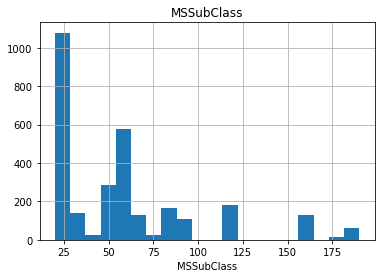

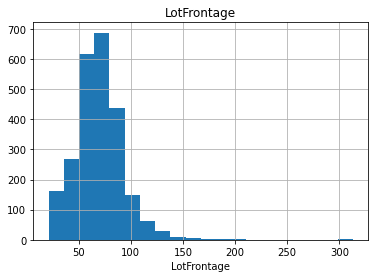

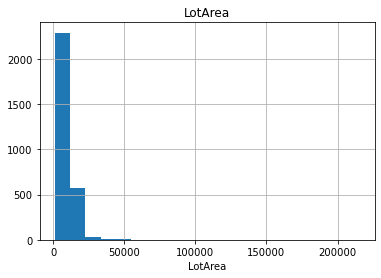

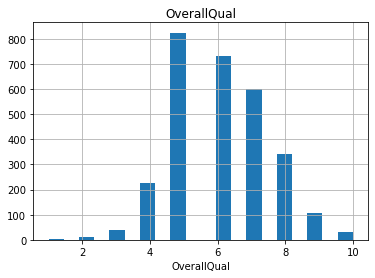

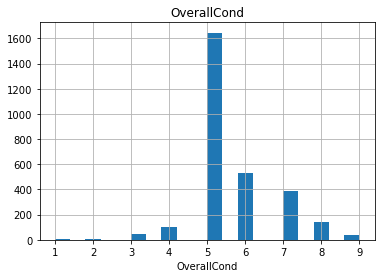

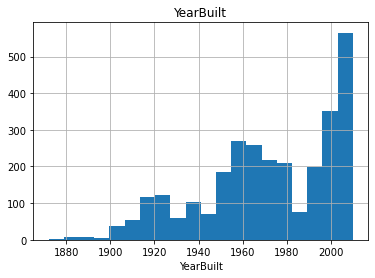

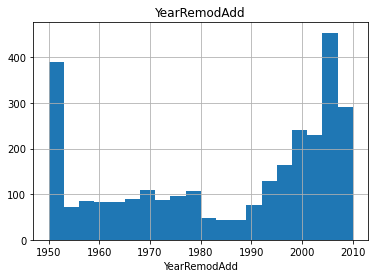

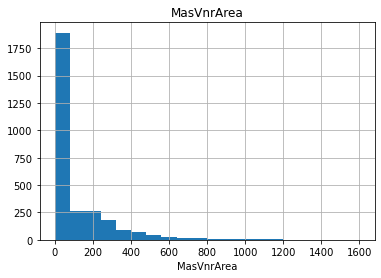

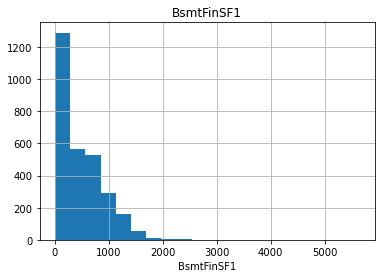

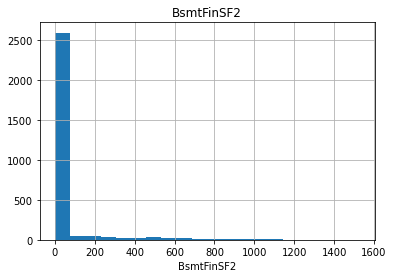

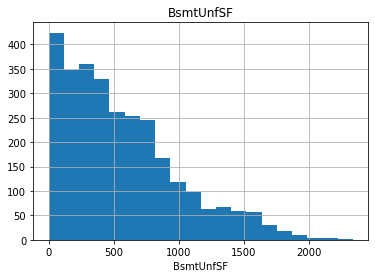

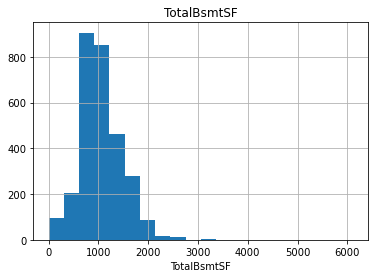

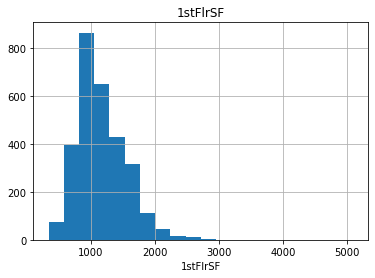

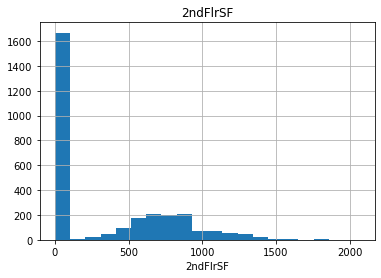

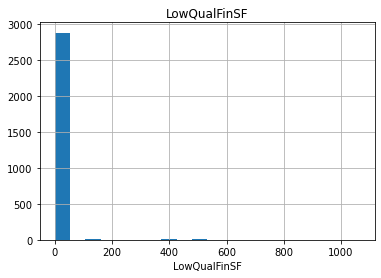

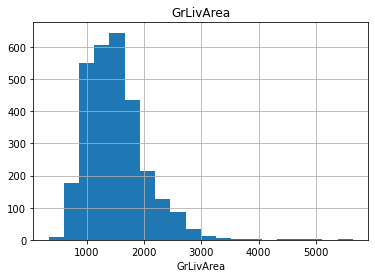

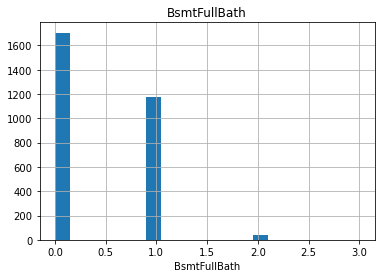

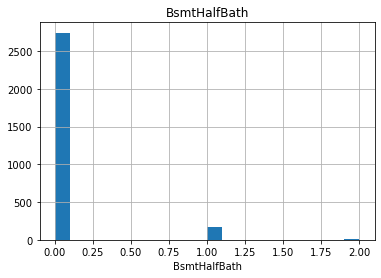

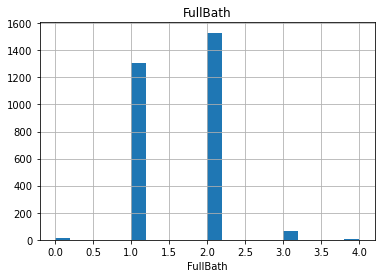

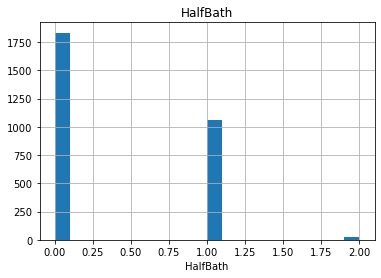

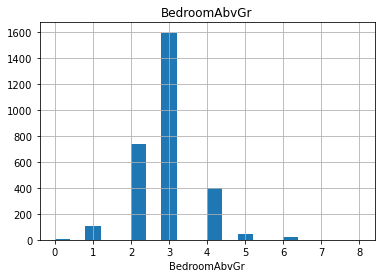

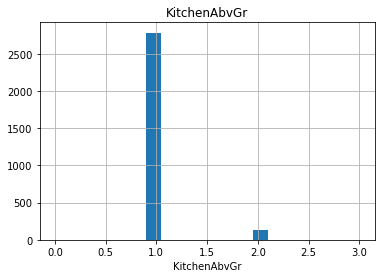

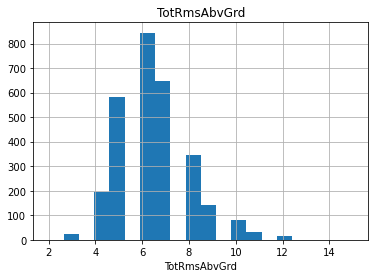

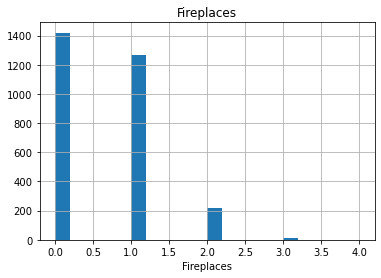

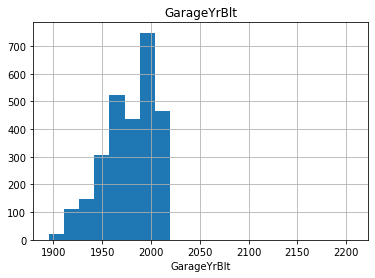

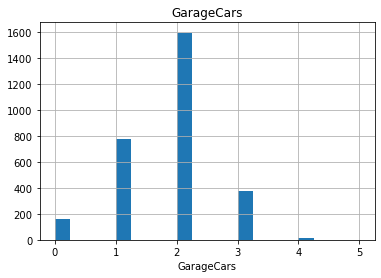

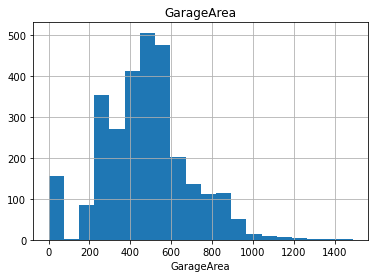

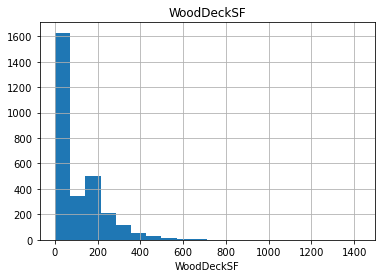

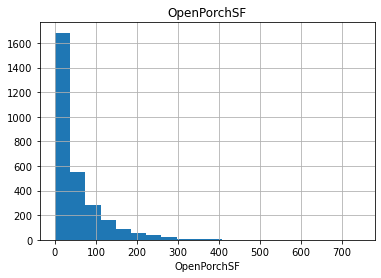

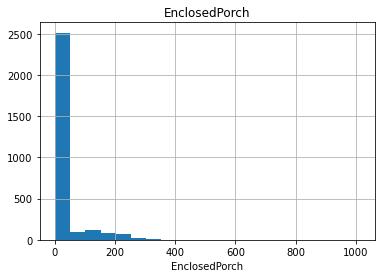

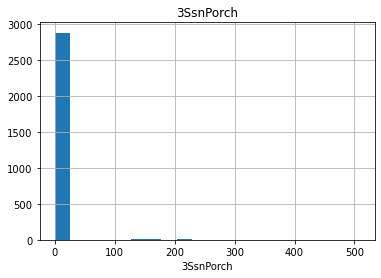

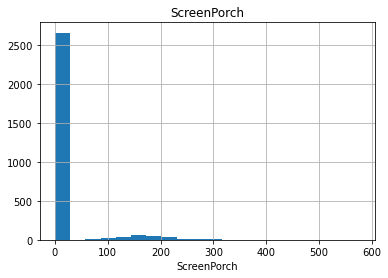

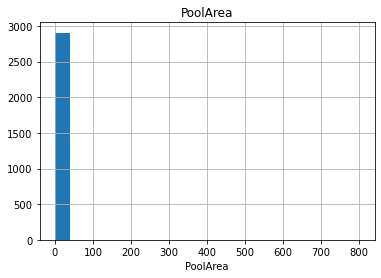

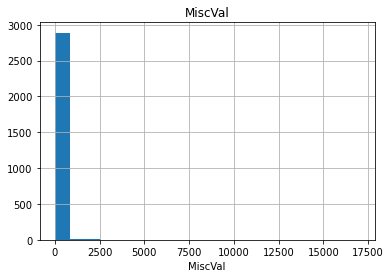

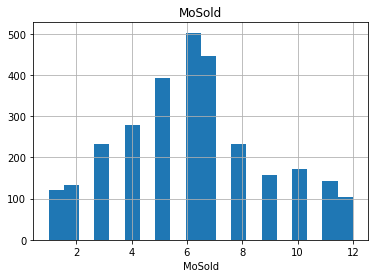

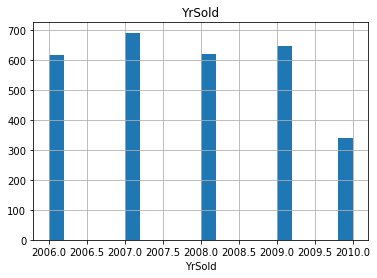

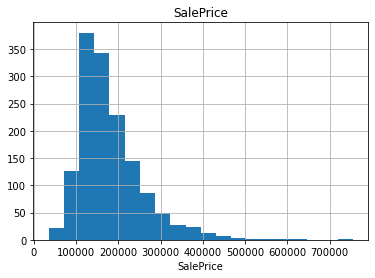

37 variables have been plotted


In [6]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Sayısal değişken sayısı: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

### 2.4. Target Analysis
Let's see statistical table of Target variable:

In [7]:
df["SalePrice"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
25%     129975.000
50%     163000.000
75%     214000.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64

Then look at the correlations between target and independent variables.

In [8]:
def find_correlation(dataframe, corr_limit=0.60):          # our limit is 0.60 if you want you can change it
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == "SalePrice":
            pass

        else:
            correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df)

MSSubClass -0.08428413512659523
LotFrontage 0.35179909657067854
LotArea 0.2638433538714063
OverallQual 0.7909816005838047
OverallCond -0.0778558940486776
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113867
MasVnrArea 0.4774930470957107
BsmtFinSF1 0.38641980624215627
BsmtFinSF2 -0.011378121450215216
BsmtUnfSF 0.214479105546969
TotalBsmtSF 0.6135805515591944
1stFlrSF 0.6058521846919166
2ndFlrSF 0.31933380283206614
LowQualFinSF -0.02560613000068015
GrLivArea 0.7086244776126511
BsmtFullBath 0.22712223313149718
BsmtHalfBath -0.016844154297359294
FullBath 0.5606637627484452
HalfBath 0.2841076755947784
BedroomAbvGr 0.1682131543007415
KitchenAbvGr -0.1359073708421417
TotRmsAbvGrd 0.5337231555820238
Fireplaces 0.4669288367515242
GarageYrBlt 0.48636167748786213
GarageCars 0.640409197258349
GarageArea 0.6234314389183598
WoodDeckSF 0.32441344456813076
OpenPorchSF 0.31585622711605577
EnclosedPorch -0.12857795792595636
3SsnPorch 0.04458366533574792
ScreenPorch 0.11144657114291048
PoolArea 0

## 3. Data Prepcoressing & Feature Engineering
### 3.1. Rare Analysis
First, observe the Rare values and perform operations.

In [9]:
def rare_analyser(dataframe, target, rare_perc):
    rare_columns = [col for col in df.columns if len(df[col].value_counts()) <= 20
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")


rare_analyser(df, "SalePrice", 0.01)

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df


df = rare_encoder(df, 0.01)
rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            nan
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


MSZoning : 5
         COUNT  RATIO  TARGET_MEDIAN
C (all)     25  0.009      74700.000
FV         139  0.048     205950.000
RH          26  0.009     136500.000
RL        2265  0.776     174000.000
RM         460  0.158     120500.000


Street : 2
      COUNT  RATIO  TARGET_MEDIAN
Grvl     12  0.004     114250.000
Pave   2907  0.996     163000.000


LotShape : 4
     COUNT  RATIO  TARGET_MEDIAN
IR1    968  0.332     1

Then drop some values after Rare analysis and observe what you have:

In [10]:

drop_list = ["Street", "Utilities", "LandSlope", "PoolQC", "MiscFeature"]
cat_cols = [col for col in df.columns if df[col].dtypes == 'O'
            and col not in drop_list]

for col in drop_list:
    df.drop(col, axis=1, inplace=True)

rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            nan
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


LotShape : 4
      COUNT  RATIO  TARGET_MEDIAN
IR1     968  0.332     189000.000
IR2      76  0.026     221000.000
Rare     16  0.005     203570.000
Reg    1859  0.637     146000.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEDIAN
Corner     511  0.175     160000.000
CulDSac    176  0.060     199262.000
FR2         85  0.029     165000.000
Inside    2133  0.731     159697.500
Rare        14  0.005     195450.000


### 3.2. Label Encoding & One-Hot Encoding

In [11]:
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


df, new_cols_ohe = one_hot_encoder(df, cat_cols)
cat_summary(df, new_cols_ohe, "SalePrice")

   MSZoning_RL  Ratio  TARGET_MEDIAN
0          654 22.405     130000.000
1         2265 77.595     174000.000


   MSZoning_RM  Ratio  TARGET_MEDIAN
0         2459 84.241     174700.000
1          460 15.759     120500.000


   MSZoning_Rare  Ratio  TARGET_MEDIAN
0           2868 98.253     164600.000
1             51  1.747     107500.000


   MSZoning_nan  Ratio  TARGET_MEDIAN
0          2915 99.863     163000.000
1             4  0.137            nan


   Alley_Pave  Ratio  TARGET_MEDIAN
0        2841 97.328     162500.000
1          78  2.672     172500.000


   Alley_nan  Ratio  TARGET_MEDIAN
0        198  6.783     140000.000
1       2721 93.217     165000.000


   LotShape_IR2  Ratio  TARGET_MEDIAN
0          2843 97.396     161000.000
1            76  2.604     221000.000


   LotShape_Rare  Ratio  TARGET_MEDIAN
0           2903 99.452     162900.000
1             16  0.548     203570.000


   LotShape_Reg  Ratio  TARGET_MEDIAN
0          1060 36.314     190000.000
1          

### 3.3. Missing Values

In [12]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(df)


              n_miss  ratio
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrArea        23  0.790
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
GarageArea         1  0.030
GarageCars         1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030


['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Fill the missing values by "median" then apply all data:

In [13]:
df = df.apply(lambda x: x.fillna(x.median()), axis=0)
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

### 3.4. Outliers

In [14]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names


has_outliers(df, num_cols)

LotFrontage : 2
LotArea : 24
MasVnrArea : 6
BsmtFinSF1 : 2
BsmtFinSF2 : 6
TotalBsmtSF : 2
1stFlrSF : 3
LowQualFinSF : 40
GrLivArea : 2
BsmtFullBath : 2
FullBath : 4
BedroomAbvGr : 1
KitchenAbvGr : 134
GarageYrBlt : 1
WoodDeckSF : 3
OpenPorchSF : 6
EnclosedPorch : 3
3SsnPorch : 37
ScreenPorch : 5
PoolArea : 13
MiscVal : 103
SalePrice : 8


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

Now, set thresholds(low and up limits) for outliers then use for outliers:

In [15]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)

has_outliers(df, num_cols)

[]

### 3.5. Standardization

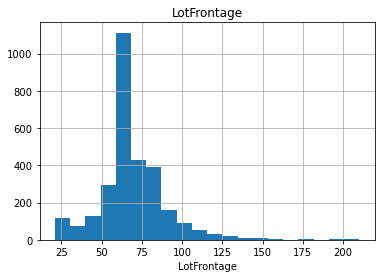

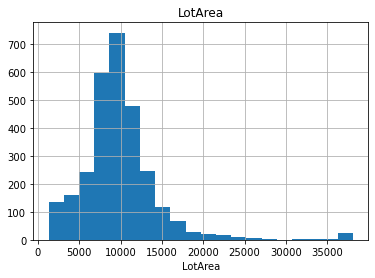

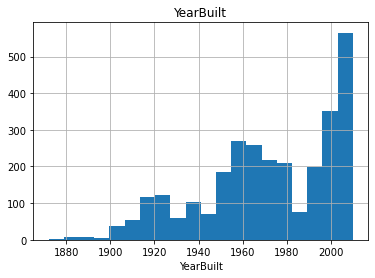

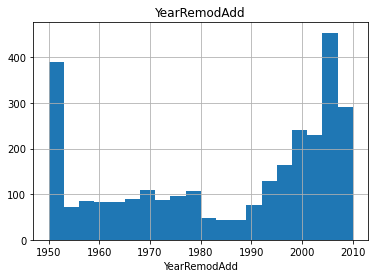

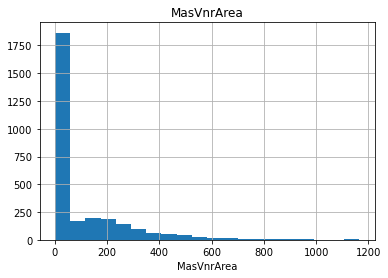

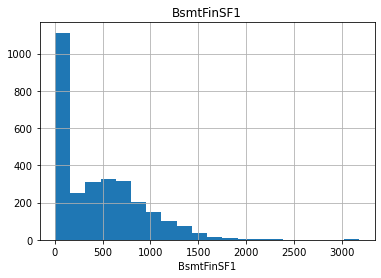

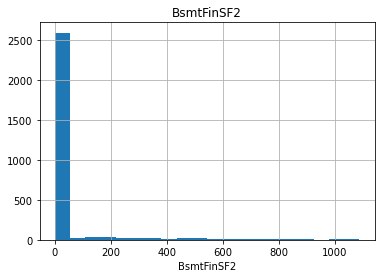

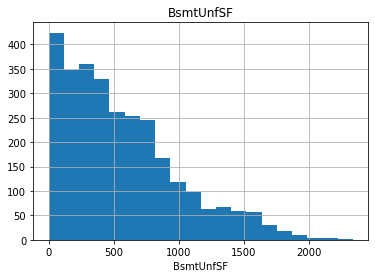

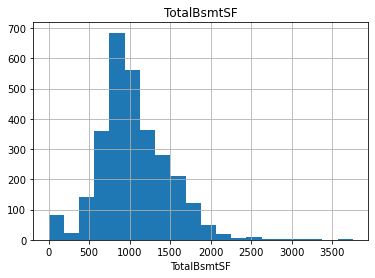

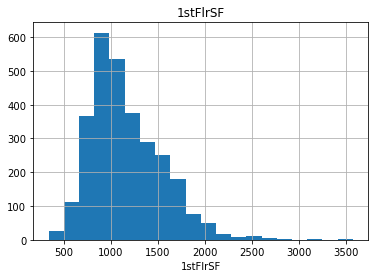

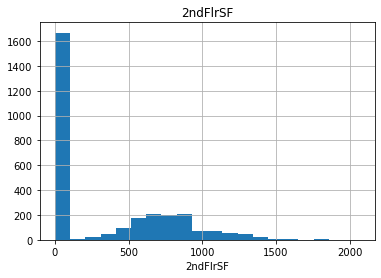

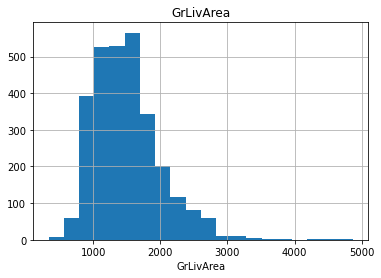

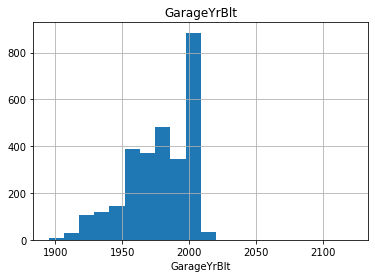

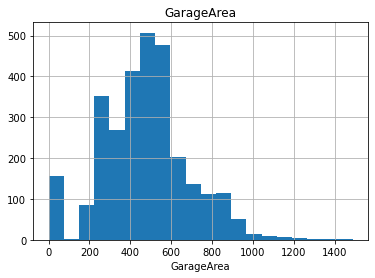

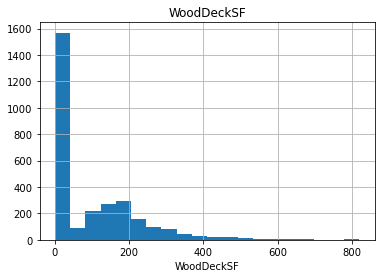

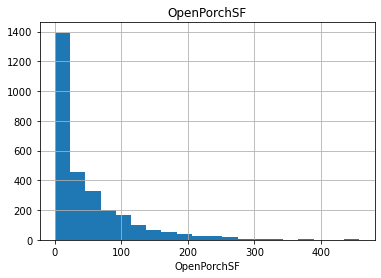

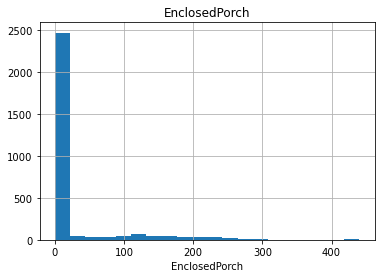

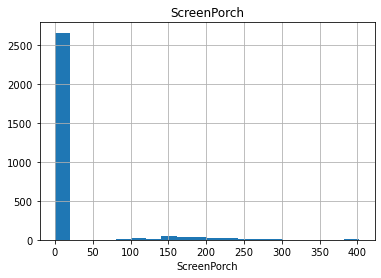

18 variables have been plotted


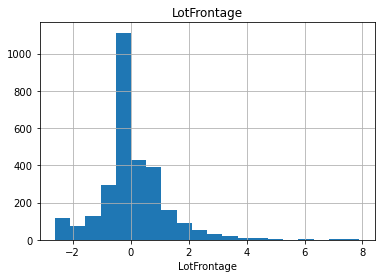

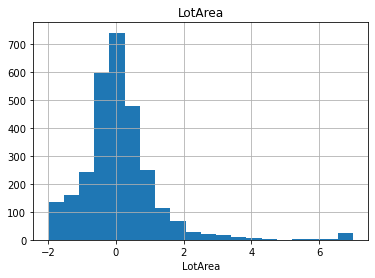

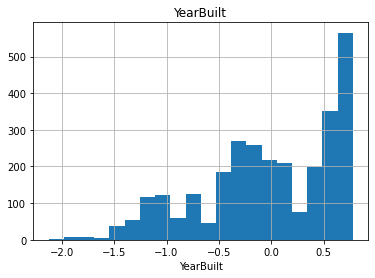

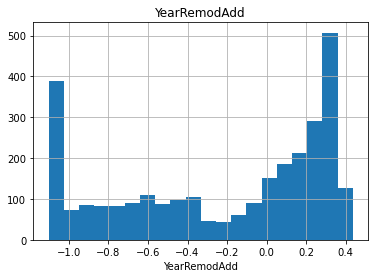

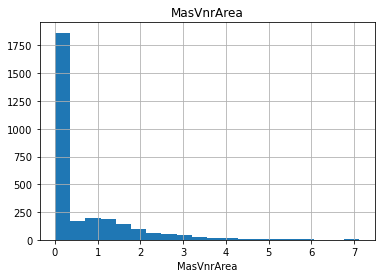

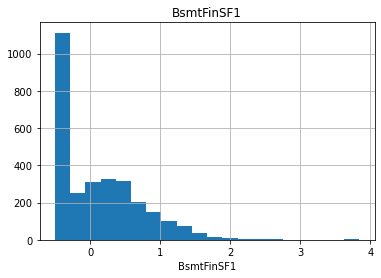

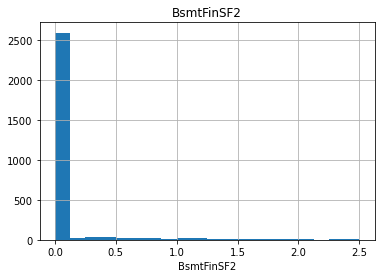

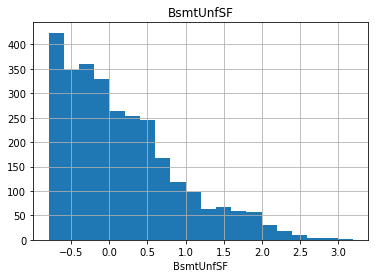

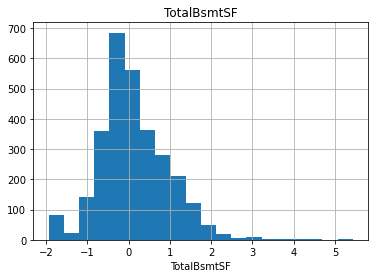

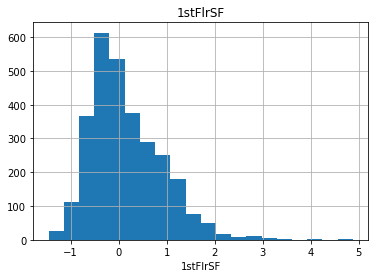

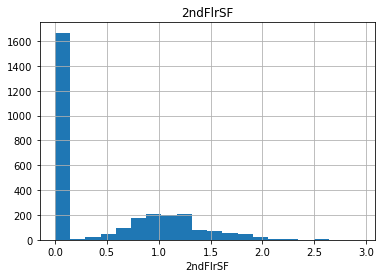

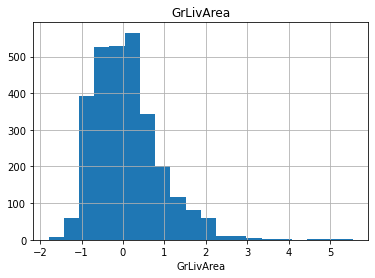

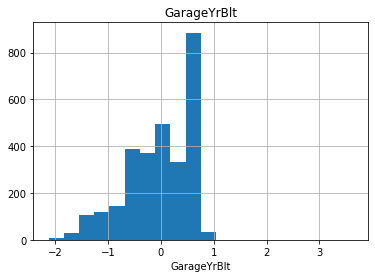

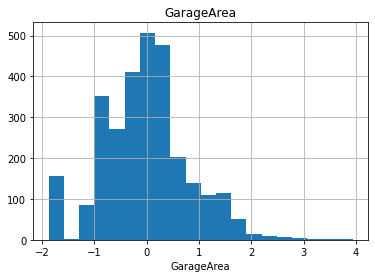

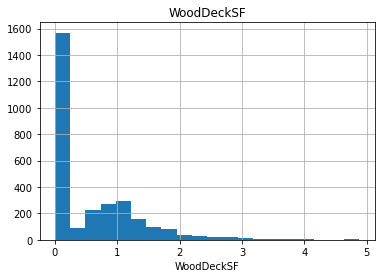

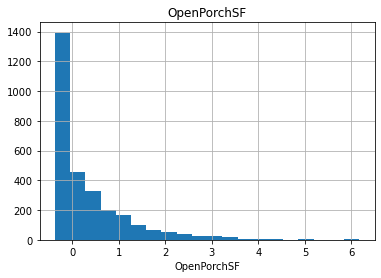

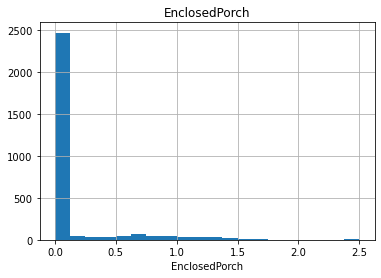

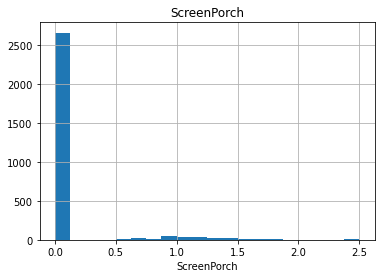

18 variables have been plotted


In [16]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 20]


cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Id"
                   and col not in "SalePrice"
                   and col not in like_num]

df[cols_need_scale].head()
df[cols_need_scale].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T
hist_for_nums(df, cols_need_scale)


def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


for col in cols_need_scale:
    df[col] = robust_scaler(df[col])


df[cols_need_scale].head()
df[cols_need_scale].describe().T
hist_for_nums(df, cols_need_scale)

## Feature Engineering

In [17]:
# Adding total sqfootage feature
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Overall quality of the house
df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]

df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)


df.loc[df["OverallQual"] < 2, "OverallQual"] = 2
df.loc[df["GarageCars"] > 4, "GarageCars"] = 4
df.loc[(df["OverallQual"] == 2) | (df["OverallQual"] == 3), "OverallQual"] = 3


# SalePrice 163k, Generally, 163k salepricants garage built value 2005
df.loc[df["GarageYrBlt"] == 2207, "GarageYrBlt"] = 2005
df.loc[df["Fireplaces"] == 4, "Fireplaces"] = 0
df.loc[df["Fireplaces"] == 3, "Fireplaces"] = 2


# NEW_1
df["new_area"] = df["GrLivArea"] + df["GarageArea"]

# NEW_2 
df["new_home"] = df["YearBuilt"]
df.loc[df["new_home"] == df["YearRemodAdd"], "new_home"] = 0
df.loc[df["new_home"] != df["YearRemodAdd"], "new_home"] = 1

# NEW_3  #Sum of Bath numbers
df["new_bath"] = df["FullBath"] + (df["HalfBath"] * 0.5)

df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,MSZoning_nan,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_Rare,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LotConfig_nan,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,Condition1_nan,Condition2_Rare,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Hip,RoofStyle_Rare,RoofStyle_nan,RoofMatl_Rare,RoofMatl_nan,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Rare,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,HeatingQC_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,Functional_nan,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageType_nan,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Rare,GarageQual_TA,GarageQual_nan,GarageCond_Rare,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,Fence_GdWo,Fence_MnPrv,Fence_Rare,Fence_nan,SaleType_New,SaleType_Rare,SaleType_WD,SaleType_nan,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,SaleCondition_nan,TotalSF,OverallGrade,haspool,has2ndfloor,new_area,new_home,new_bath
0,1,60.000,-0.167,-0.245,7.000,5.000,0.632,0.256,1.199,0.460,0.000,-0.542,-0.262,-0.442,1.213,0.000,0.431,1.000,0.000,2.000,1.000,3.000,1.000,8.000,0.000,0.608,2.000,0.266,0.000,0.500,0.000,0.000,0.000,0.000,0.000,2.000,2008.000,208500.000,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1

Last control before bridge :)

In [18]:
missing_values_table(df)
has_outliers(df, num_cols)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []
TotalBsmtSF : 2
1stFlrSF : 3
GrLivArea : 2
WoodDeckSF : 3
OpenPorchSF : 6


['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

## 5. Modelling
### 5.1. Liear, Ridge, Lasso and ElasticNet Regression Models

In [19]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

X = train_df.drop('SalePrice', axis=1)
y = train_df[["SalePrice"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)



models = [('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('ElasticNet', ElasticNet())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

df["SalePrice"].mean()

LinearRegression: 39332.302794
Ridge: 39309.735606
Lasso: 39336.207783
ElasticNet: 38834.622542


171728.35731414868

### 5.2. CatBoost Model

In [20]:
from catboost import CatBoostRegressor

X = df.loc[:1459, :].drop(["SalePrice", "Id"], axis=1)
y = df.loc[:1459, "SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, y_test)))


# TO CSV , Load to Kaggle

df1 = pd.DataFrame({"Id": df.loc[1460:, "Id"],
                      "SalePrice": catboost_model.predict(df.loc[1460:, :].drop(["SalePrice", "Id"], axis=1))})

df1.to_csv('submission_catboost.csv', index=False)

Learning rate set to 0.040124
0:	learn: 74533.4466705	total: 60ms	remaining: 60s
1:	learn: 72608.9252205	total: 65.1ms	remaining: 32.5s
2:	learn: 70700.6314985	total: 69.8ms	remaining: 23.2s
3:	learn: 68949.8073658	total: 74.7ms	remaining: 18.6s
4:	learn: 67125.5091610	total: 79.5ms	remaining: 15.8s
5:	learn: 65490.5939174	total: 84.3ms	remaining: 14s
6:	learn: 63751.7041630	total: 89ms	remaining: 12.6s
7:	learn: 62200.4858346	total: 94.6ms	remaining: 11.7s
8:	learn: 60738.1093229	total: 99.2ms	remaining: 10.9s
9:	learn: 59273.7160168	total: 104ms	remaining: 10.3s
10:	learn: 57881.4491130	total: 109ms	remaining: 9.8s
11:	learn: 56692.5368364	total: 114ms	remaining: 9.38s
12:	learn: 55317.0925068	total: 119ms	remaining: 9s
13:	learn: 54016.9507815	total: 123ms	remaining: 8.68s
14:	learn: 52818.1292733	total: 128ms	remaining: 8.41s
15:	learn: 51646.2163561	total: 133ms	remaining: 8.17s
16:	learn: 50518.5553131	total: 137ms	remaining: 7.95s
17:	learn: 49511.4737910	total: 142ms	remaining:


## Conclusion

We got 19K in this model estimation evaluation. A very successful modeling has been realized.


#### Note:

   - After this notebook, my aim is to prepare 'kernel' which is 'not clear' data set.

   - If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

   - Thank you for your suggestion and votes ;)